In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)

True

In [2]:
# Load the dataset
data = pd.read_csv('cyberbullying_data.csv')

# Display dataset preview and structure
print("Dataset Preview:")
display(data.head())

# Check the dataset structure
print("\nDataset Info:")
data.info()

Dataset Preview:


,label,cyberbullying_type
0,.omg why are poc wearing fugly blue contacts s...,Non-Bullying
1,.Sorry but most of the runners popular right n...,Non-Bullying
2,".those jeans are hideous, and I?m afraid he?s ...",Non-Bullying
3,.I had to dress up for a presentation in class...,Non-Bullying
4,.Am I the only one who thinks justin bieber is...,Non-Bullying



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   label               1065 non-null   object
 1   cyberbullying_type  1065 non-null   object
dtypes: object(2)
memory usage: 16.8+ KB


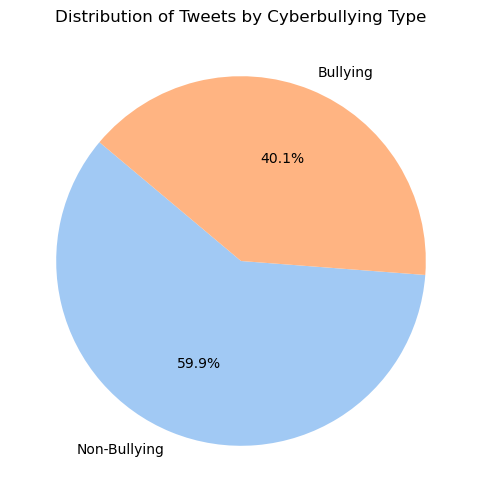

In [3]:
# Plot the distribution of cyberbullying types as a pie chart
plt.figure(figsize=(8, 6))
data['cyberbullying_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Tweets by Cyberbullying Type')
plt.ylabel('')  # Hide the y-label for aesthetics
plt.show()

In [4]:
# Convert 'cyberbullying_type' to binary labels
data['binary_label'] = data['cyberbullying_type'].apply(lambda x: 0 if x == 'Non-Bullying' else 1)

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Define a preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing to the 'label' column
data['processed_label'] = data['label'].apply(preprocess_text)

# Display processed text
print("\nProcessed Text Preview:")
display(data[['label', 'processed_label', 'binary_label']].head())


Processed Text Preview:


,label,processed_label,binary_label
0,.omg why are poc wearing fugly blue contacts s...,omg poc wearing fugly blue contacts 2018 pleas...,0
1,.Sorry but most of the runners popular right n...,sorry runners popular right plain fugly,0
2,".those jeans are hideous, and I?m afraid he?s ...",jeans hideous im afraid hes bought entire coll...,0
3,.I had to dress up for a presentation in class...,dress presentation class today im giving serio...,0
4,.Am I the only one who thinks justin bieber is...,one thinks justin bieber fugly af,0


In [5]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the processed text to numerical features
X = vectorizer.fit_transform(data['processed_label']).toarray()
y = data['binary_label']

# Check the dimensions of features and labels
print("\nFeature Shape:", X.shape)
print("Label Shape:", y.shape)


Feature Shape: (1065, 3828)
Label Shape: (1065,)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print("\nTraining Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])


Training Set Size: 852
Testing Set Size: 213



Naive Bayes Model Performance:
{'Accuracy': 0.7089201877934272, 'Precision': 0.6060606060606061, 'Recall': 0.5263157894736842, 'F1-Score': 0.5633802816901409}


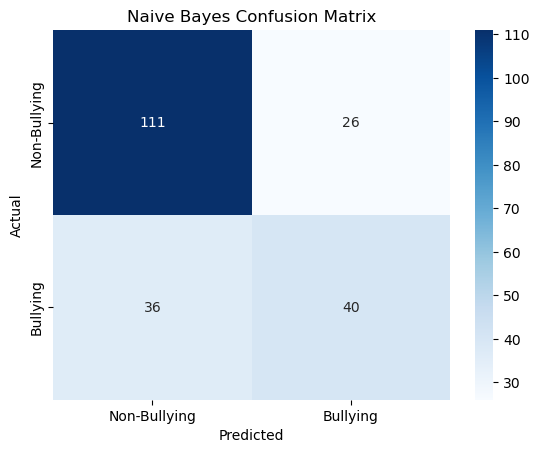

In [7]:
# Train Naive Bayes Model
start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
end_time = time.time()

# Predict and evaluate
nb_predictions = nb_model.predict(X_test)
nb_metrics = {
    "Accuracy": accuracy_score(y_test, nb_predictions),
    "Precision": precision_score(y_test, nb_predictions),
    "Recall": recall_score(y_test, nb_predictions),
    "F1-Score": f1_score(y_test, nb_predictions)
}

# Print metrics and confusion matrix
print("\nNaive Bayes Model Performance:")
print(nb_metrics)

conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bullying', 'Bullying'], yticklabels=['Non-Bullying', 'Bullying'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Model Performance:
{'Accuracy': 0.7230046948356808, 'Precision': 0.7297297297297297, 'Recall': 0.35526315789473684, 'F1-Score': 0.4778761061946903}


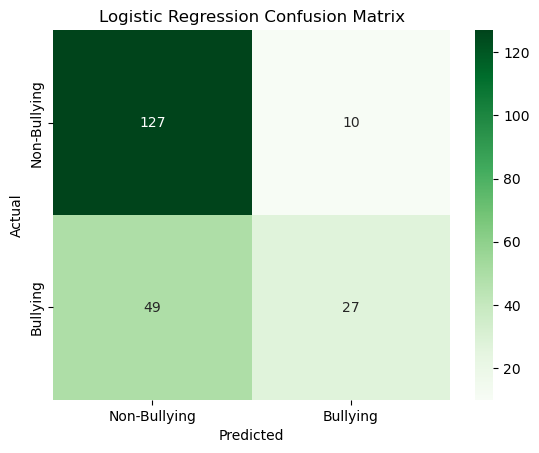

In [8]:
# Train Logistic Regression Model
start_time = time.time()
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
end_time = time.time()

# Predict and evaluate
log_reg_predictions = log_reg_model.predict(X_test)
log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, log_reg_predictions),
    "Precision": precision_score(y_test, log_reg_predictions),
    "Recall": recall_score(y_test, log_reg_predictions),
    "F1-Score": f1_score(y_test, log_reg_predictions)
}

# Print metrics and confusion matrix
print("\nLogistic Regression Model Performance:")
print(log_reg_metrics)

conf_matrix_lr = confusion_matrix(y_test, log_reg_predictions)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Bullying', 'Bullying'], yticklabels=['Non-Bullying', 'Bullying'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


,Accuracy,Precision,Recall,F1-Score
Naive Bayes,0.708920,0.606061,0.526316,0.563380
Logistic Regression,0.723005,0.729730,0.355263,0.477876


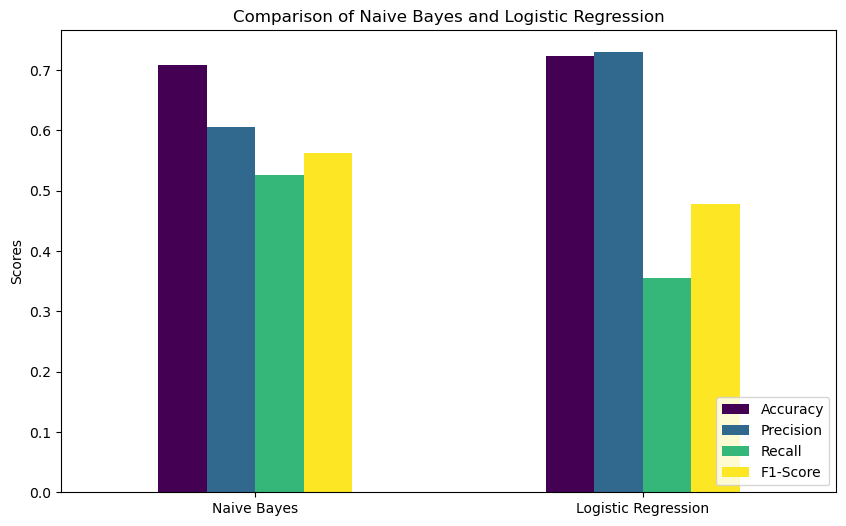

In [9]:
# Combine metrics for both models
comparison_metrics = pd.DataFrame({
    "Naive Bayes": nb_metrics,
    "Logistic Regression": log_reg_metrics
})

# Transpose and display
comparison_metrics = comparison_metrics.T
display(comparison_metrics)

# Visualize model comparison
comparison_metrics.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Comparison of Naive Bayes and Logistic Regression")
plt.ylabel("Scores")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [10]:
# Save models and vectorizer for future use
pickle.dump(nb_model, open('nb_model.pkl', 'wb'))
pickle.dump(log_reg_model, open('log_reg_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

print("\nModels and vectorizer saved successfully.")


Models and vectorizer saved successfully.
